In [1]:
import os
import numpy as np
import pandas as pd

EXPORT_ORIGINAL = False
FEATURE_IMPORTANCE_ORIGINALS = True ## INCLUIR MODELO

pd.set_option('display.max_columns',100)
pd.set_option('precision', 3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

DEBUG = True
d_path = { 'train': 'historical_files\\FeaturesFiles\\',
           'test': 'historical_files\\TestFiles\\'}

s_path = d_path['train']
l_dir = os.listdir(s_path)

df_train = pd.DataFrame()
d_type = 'ft_2020'  # process each month 
l_file = [_file for _file in l_dir if d_type in _file]
for _file in l_file:
  df_aux = pd.read_csv(os.path.join(s_path, _file))
  df_aux = df_aux.reset_index().rename(columns={'index': 'trd_id'})
  df_train = df_train.append(df_aux,
                             ignore_index=True,
                             sort=False)

# check if it is needed
# df_train.set_index(['date_trd','update','time'], inplace=True)
# df_train['freq'] = df_train.groupby('date_trd')['freq'].fillna(method='ffill')  

# DEBUG: df_train.loc[('2020-06-01',36914)].head(50)
# df_train.groupby('date_trd')['trd_id'].max()


In [3]:
df_train.columns.to_list()

['trd_id',
 'date_trd',
 'update',
 'time',
 'side',
 'avg_price',
 'qty',
 'chg_cum',
 'chg_max',
 'id_p',
 'first_price',
 'last_price',
 'flag_big',
 'chg_max_mp',
 'seq',
 's_run',
 'id_run',
 'max_run',
 'flag_d',
 'vewmap',
 'vewmag',
 'vewmag_c',
 'vewmag_v',
 'freq',
 'f_vol_trd',
 'f_n_trd',
 'f_vol_big',
 'f_n_big',
 'f_vol_big_ratio',
 'f_big_c',
 'f_big_v',
 'f_aggpior_c',
 'f_aggpior_v',
 'f_aggimb',
 'f_aggimb_big',
 'f_n_aggimb',
 'f_agg_net_m',
 'f_aggbig_net_m',
 'f_loc_aggbig_c_m',
 'f_loc_aggbig_v_m',
 'f_loc_agg_net_m',
 'f_loc_aggbig_net_m',
 'f_loc_agg_imb_m',
 'f_loc_aggbig_imb_m',
 'f_pagg_c_best',
 'f_pagg_c_best_0.5',
 'f_pagg_c_best_0.7',
 'f_pagg_c_best_0.9',
 'f_pagg_v_best',
 'f_pagg_v_best_0.5',
 'f_pagg_v_best_0.7',
 'f_pagg_v_best_0.9',
 'f_abagg',
 'f_n_p',
 'f_agg_net_d',
 'f_aggbig_net_d',
 'f_s_run',
 'f_chgfreq',
 'f_last_d_s',
 'f_abs_c',
 'f_abs_v',
 'f_PA_up',
 'f_PA_down',
 'f_loc_agg_net_d',
 'f_loc_aggbig_net_d',
 'f_int_c',
 'f_int_c_0.6',
 

In [4]:
df_train.groupby(['date_trd','id_run'])['max_run'].last()

date_trd    id_run
2020-06-01  0        -0.500
            1        -6.000
            2         6.500
            3        -5.000
            4        -2.500
                      ...  
2020-12-29  276       3.000
            277      10.000
            278      -5.000
            279       8.500
            280      -4.000
Name: max_run, Length: 54897, dtype: float64

In [6]:
df_freq = df_train.groupby(['date_trd','freq','id_run'], as_index=False)['max_run'].last()

In [7]:
df_freq 

,date_trd,freq,id_run,max_run
0,2020-06-01,12.000,0,-0.500
1,2020-06-01,12.000,1,-6.000
2,2020-06-01,12.000,2,6.500
3,2020-06-01,12.000,3,-5.000
4,2020-06-01,12.000,4,-2.500
...,...,...,...,...
54892,2020-12-29,10.000,276,3.000
54893,2020-12-29,10.000,277,10.000
54894,2020-12-29,10.000,278,-5.000
54895,2020-12-29,10.000,279,8.500


In [11]:
df_freq['date_trd'].value_counts().head(50)

2020-06-12    875
2020-06-16    783
2020-07-14    728
2020-06-30    712
2020-06-25    682
2020-07-09    678
2020-06-04    660
2020-06-15    653
2020-07-02    640
2020-06-03    635
2020-06-26    625
2020-06-10    597
2020-06-19    590
2020-08-20    582
2020-07-01    581
2020-06-05    577
2020-06-24    567
2020-11-09    559
2020-10-28    530
2020-09-04    522
2020-07-16    520
2020-06-17    516
2020-09-24    515
2020-06-01    514
2020-08-12    508
2020-08-21    498
2020-09-22    494
2020-08-27    493
2020-06-29    489
2020-08-11    484
2020-09-03    480
2020-07-10    479
2020-10-30    476
2020-09-29    474
2020-07-15    467
2020-07-08    463
2020-09-02    458
2020-11-06    448
2020-11-18    439
2020-08-13    437
2020-06-18    437
2020-09-30    437
2020-09-21    434
2020-06-23    429
2020-07-23    425
2020-07-24    423
2020-11-23    422
2020-10-02    415
2020-12-10    414
2020-06-09    411
Name: date_trd, dtype: int64

In [15]:
df_freq['max_run_abs'] = df_freq['max_run'].abs()

In [16]:
df_freq_resumo = df_freq.groupby(['date_trd','freq'], as_index=False)['max_run_abs'].mean()

In [17]:
df_freq_resumo

,date_trd,freq,max_run_abs
0,2020-06-01,12.000,7.157
1,2020-06-02,12.000,5.773
2,2020-06-03,13.000,5.606
3,2020-06-04,14.000,6.470
4,2020-06-05,15.000,6.172
...,...,...,...
139,2020-12-21,5.000,5.655
140,2020-12-22,6.000,5.774
141,2020-12-23,7.000,5.379
142,2020-12-28,8.000,5.344


In [18]:
df_freq = df_train.groupby(['date_trd','freq','id_run'], as_index=False)[['max_run','flag_d']].last()

In [20]:
df_freq['max_run_abs'] = df_freq['max_run'].abs()

In [21]:
df_freq_resumo = df_freq.groupby(['date_trd','freq','flag_d'], as_index=False)['max_run_abs'].mean()

In [22]:
df_freq_resumo

,date_trd,freq,flag_d,max_run_abs
0,2020-06-01,12.000,0,4.545
1,2020-06-01,12.000,1,14.716
2,2020-06-02,12.000,0,4.423
3,2020-06-02,12.000,1,9.979
4,2020-06-03,13.000,0,4.614
...,...,...,...,...
283,2020-12-23,7.000,1,8.630
284,2020-12-28,8.000,0,4.047
285,2020-12-28,8.000,1,8.938
286,2020-12-29,10.000,0,4.218


In C:\Users\Desktop\Anaconda3\envs\ngym36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Desktop\Anaconda3\envs\ngym36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Desktop\Anaconda3\envs\ngym36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Desktop\Anaconda3\envs\ngym36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Desktop\Anaconda3\envs\n

<AxesSubplot:xlabel='max_run_abs', ylabel='freq'>

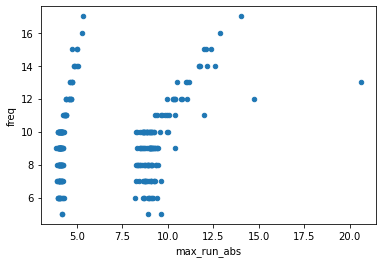

In [23]:
df_freq_resumo.plot.scatter(x='max_run_abs', y='freq')

Visível a separação entre o tamanho dos movimentos direcionais e não direcionais (`flag_d = 1`).
Lembrando que o flag direcional é definido a partir de x% da frequência de mercado, baseada no range price diário dos últimos 3 dias. 

In [1]:
df_freq['max_run_abs'].hist()

NameError: name 'df_freq' is not defined